# Exploratory data Analysis

## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
import warnings

## Reading the dataset


In [2]:
df = pd.read_csv("wage.csv")

In [3]:
df

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
0,1.0,3.24,12.0,2.0,3.0,female,white
1,0.0,3.00,11.0,0.0,2.0,male,white
2,1.0,6.00,8.0,28.0,0.0,male,white
3,1.0,5.30,12.0,2.0,1.0,male,white
4,1.0,8.75,16.0,8.0,0.0,male,white
...,...,...,...,...,...,...,...
520,1.0,15.00,16.0,2.0,2.0,female,white
521,0.0,2.27,10.0,0.0,3.0,female,white
522,1.0,4.67,15.0,18.0,3.0,male,white
523,1.0,11.56,16.0,1.0,0.0,male,white


viewing the data in the dataset to help guide us.

## 1. Desciptive statistics on the dataset

In [4]:
df.describe()

,married,hourly_wage,years_in_education,years_in_employment,num_dependents
count,522.000000,517.000000,522.000000,519.000000,520.000000
mean,0.609195,5.917737,12.557471,5.152216,1.044231
std,0.488399,3.699058,2.757219,7.257133,1.258484
min,0.000000,0.530000,0.000000,0.000000,0.000000
25%,0.000000,3.350000,12.000000,0.000000,0.000000
50%,1.000000,4.670000,12.000000,2.000000,1.000000
75%,1.000000,6.880000,14.000000,7.000000,2.000000
max,1.000000,24.980000,18.000000,44.000000,6.000000


Conclusion: The above statistics shows results describing the variables in terms of;

    count: showing the number of not empty values
    mean: showing the average mean of each variable
    std: showing the standard deviation of each variable
    min: the minimum value in that variables dataset
    max: the maximum value in the variables dataset
    Percentages( 25% , 50% , 75%): showing the percentiles. meaning how many of the value are less than the given percentile

## 2. checking if any records in the data the has missing values

In [5]:
df.isna().sum()

married                 3
hourly_wage             8
years_in_education      3
years_in_employment     6
num_dependents          5
gender                  4
race                   10
dtype: int64

Conclusion: From the above informations it can be seen that multiple records or variables have some missing values in them

## Deleting records with null or missing values

In [6]:
df = df.dropna()
df

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
0,1.0,3.24,12.0,2.0,3.0,female,white
1,0.0,3.00,11.0,0.0,2.0,male,white
2,1.0,6.00,8.0,28.0,0.0,male,white
3,1.0,5.30,12.0,2.0,1.0,male,white
4,1.0,8.75,16.0,8.0,0.0,male,white
...,...,...,...,...,...,...,...
519,0.0,5.65,12.0,0.0,0.0,male,white
520,1.0,15.00,16.0,2.0,2.0,female,white
521,0.0,2.27,10.0,0.0,3.0,female,white
522,1.0,4.67,15.0,18.0,3.0,male,white


Conclusion: It can be seen that records with missing values have been successfully deleted. previously we had record number 524 with a missing value in it hourly_wage column, but now it cannot be found, meaning it has been deleted.

### Rechecking for missing values to confirm record deletion

In [7]:
df.isna().sum()

married                0
hourly_wage            0
years_in_education     0
years_in_employment    0
num_dependents         0
gender                 0
race                   0
dtype: int64

Rechecking for the missing values since we cannot go through all the records because it is some how large

## 3. Graph visualising the distribution of an individual continuos variable(hourly_wage)

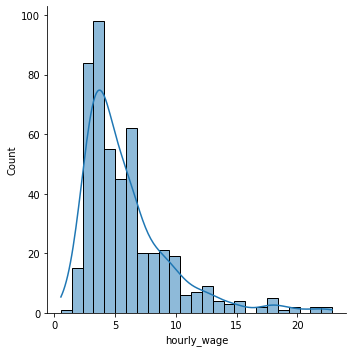

In [8]:
sns.displot(df.hourly_wage,kde=True)

Conclusion: From the above distribution it can be seen that the graph is not normally distributed but rather, it has a positively skewed distribution which tells us that the mean is greater than the median as the data is more towards the lower side.

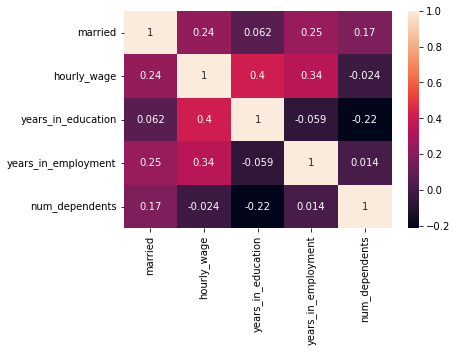

In [9]:
sns.heatmap(df.corr(), annot = True)
plt.show()

conclusion: The heatmap shows a numerical representation of the correlation between variables. which shows that years_in_education has the highest correlation to hourly_wage since, 0.4 is the closest to 1.

## 4. visualising relationship in a pair of continuous variable 

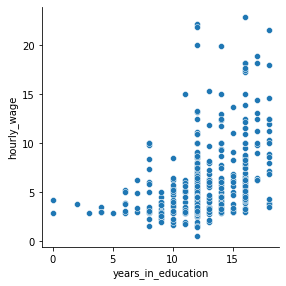

In [10]:
sns.pairplot(df, x_vars='years_in_education', y_vars='hourly_wage', height=4, aspect=1, kind='scatter')
plt.show()

Conclusion: years_in_education is strongly,low positively,non linearly correlated with hourly_wage

## 5. Displaying unique values of the categorical variable "gender"

In [11]:
df.gender.unique()

array(['female', 'male'], dtype=object)

Conclusion: It can be seen that the categorical variable has only two unique values which are; male and female

## 6. contingency table for 2 potentially related categorical variable

In [12]:
contingency = pd.crosstab(df['gender'],df['married'])
contingency 

married,0.0,1.0
gender,,
female,107,124
male,82,174


Conclusion: The contingency table shows the number of males and females who are married and the ones not married

### Statistical test of independence for the 2 categorical variables in the contingency table

In [13]:
chi2, p, dof, expected = chi2_contingency(contingency)

print("the computed chi -square value: ", chi2)
print("the computed chi -square p-value: ", p)
print("the degree of freedom: ", dof)
print("the expected result: ", expected)

the computed chi -square value:  9.847248448798311
the computed chi -square p-value:  0.0017008597274905852
the degree of freedom:  1
the expected result:  [[ 89.64887064 141.35112936]
 [ 99.35112936 156.64887064]]


Conclusion: The chi square value is 9.85. The chance of such a value in the contingency if there is no association between the 2 categorical  variable is 0.002 which is called the p-value or significance. Usually if the p-value is below 0.05 which in this case it is, indicates that there is an association or dependence between the 2 variables.
The df(degree of freedom) is an indication of the size of our contigency table.
The expected results are the counts to be expected if the 2 variables had no influence on each other.

## 7. retrieving subsets of the data 

criteria for retrieving subsets
1. married must be yes = 1.0
2. hourly wage should be equal or greater than 5
3. years in education should be equal or greater than 10

In [14]:
#defining the criteria for the subset
subset_criteria=df[(df['married']==1.0)&(df['hourly_wage']>=5)&(df['years_in_education']>=10)]

#dropping other columns from the subset dataframe
subset=subset_criteria.drop(['race','num_dependents','years_in_employment','gender'],axis=1)

In [15]:
subset

,married,hourly_wage,years_in_education
3,1.0,5.30,12.0
4,1.0,8.75,16.0
8,1.0,18.18,17.0
11,1.0,8.77,12.0
13,1.0,22.20,12.0
...,...,...,...
513,1.0,9.00,17.0
516,1.0,9.33,14.0
517,1.0,7.50,12.0
520,1.0,15.00,16.0


Conclusion: From the table above, it can be seen that we have a sum of 159 records which follow the criteria.

In [16]:
subset.describe()

,married,hourly_wage,years_in_education
count,159.0,159.000000,159.000000
mean,1.0,8.963459,13.880503
std,0.0,3.924356,2.123899
min,1.0,5.000000,10.000000
25%,1.0,6.250000,12.000000
50%,1.0,7.780000,14.000000
75%,1.0,10.000000,16.000000
max,1.0,22.860000,18.000000


Conclusion: The above statistics shows results describing the variables of the subset in terms of;

    count: showing the number of not empty values
    mean: showing the average mean of each variable
    std: showing the standard deviation of each variable
    min: the minimum value in that variables dataset
    max: the maximum value in the variables dataset
    Percentages( 25% , 50% , 75%): showing the percentiles. meaning how many of the value are less than the given percentile

## 8. Statistical test of significance between 2 means of subset data

In [17]:
yie = subset['years_in_education']
hw = subset['hourly_wage']
ttest_ind(yie, hw, equal_var=False)

Ttest_indResult(statistic=13.894742200286021, pvalue=1.0509554980617064e-32)

Conclusion: The above results means that, the chance of the t-value(13.89) if the assumption about the difference in mean will be true has a significance of 1.05e-32. In this case the assumption about the difference in mean would be that, the two means are not equal because the chance is too low due to the p-value being below the significant value of 0.05.

## 9. Table that groups the data by a certain categorical variable

The categorical variable "gender" is going to be grouped based on "hourly_wage"

In [18]:
df.groupby(['gender'])['hourly_wage'].agg(['count','sum','mean','median'])

,count,sum,mean,median
gender,,,,
female,231,1067.99,4.623333,3.75
male,256,1811.08,7.074531,6.00


Conclusion: The above table shows a summary of the group with the count showing the number of females and males in the group, sum showing the total amount hourly_wage in each group, and the mean and median of value of hourly wage i each group.

## 10. Implementing linear regression model

For this regression model I will be making use of the most important independent variables which is widely considered as a criteria for wage pay in every organisation.
These variables are;

     1.years_in_employment which denotes employees work experience and skills,
     2.years_in_education which denotes the qualification of the employee.
 
The reason for choosing these variables is because, the other variables are not widely considered as a criteria for wage pay as it violates employment law. That is, employers are prohibited from discriminating against applicants and employees based on non job-related factors like marital status, race etc.

## Importing packages

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Visual representation of how independent variables are correlated to the dependent variable

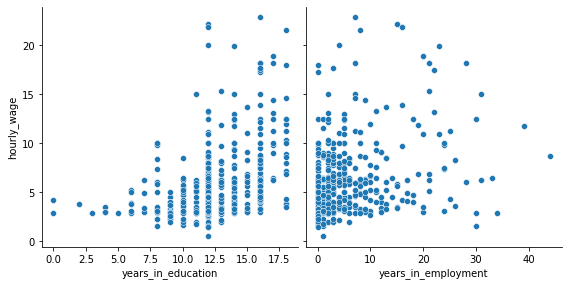

In [20]:
 
sns.pairplot(df, x_vars=['years_in_education','years_in_employment'], y_vars='hourly_wage', height=4, aspect=1, kind='scatter')
plt.show()

Conclusion: The grahs above shows that both independent variables are strongly, low positively, non linearly correlated to the target variable('hourly_wage')

#### Setting the value for x and y

In [21]:
x = df[['years_in_education','years_in_employment']]
y = df['hourly_wage']

### Splitting the dataset into train and test set

In [22]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.33, random_state=100) 

We need a model that can perform well on unknown data, therefore we utilize test data to test the trained model's performance at the end. in this case the test size is 1/3 of the data.

### Implementing the model

In [23]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

We cannot implement multiple regression so we implement it as linear and fit the object it to the data

### Actual value, predicted value and the residual

In [24]:
y_pred=mlr.predict(x_test)
mlr_diff = pd.DataFrame({'Actual hourly wage': y_test, 'Predicted hourly wage': y_pred, 'Residual':y_pred-y_test})
mlr_diff

,Actual hourly wage,Predicted hourly wage,Residual
293,2.91,4.734780,1.824780
355,4.51,5.104654,0.594654
506,6.63,7.146335,0.516335
106,6.67,6.584154,-0.085846
471,2.65,6.584154,3.934154
...,...,...,...
236,3.25,4.734780,1.484780
395,3.10,1.021294,-2.078706
343,5.25,6.150177,0.900177
49,1.63,4.734780,3.104780


The actual value is the value obtained from observation or measuring of the available data. Whiles, the predicted value is the value of the variable predicted based on our regression analysis. the residual is the difference between the actual value and the predicted value

In [25]:
print("R squared value for the model: ",mlr.score(x,y)*100)

R squared value for the model:  28.85375196159258


Conclusion: Due to the R-square value being 28.85, it means the model has a low effect. But R-square is just a measure of explanatory power and not  fit. You can generate lots of data with low R-square, because models are not expected to include all the relevant predictors to explain an outcome variable. R-square, even when small, can be significantly different from 0, indicating that the regression model has statistically significant explanatory power.